In [1]:
import tensorflow as tf

2023-05-28 23:48:05.573603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 23:48:06.917751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import keras 

In [3]:
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0],-1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0],-1)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 ,activation=tf.nn.relu,input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128 ,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10 ,activation=tf.nn.softmax))

2023-05-28 23:48:55.605667: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


2023-05-28 23:49:05.609266: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2677 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accurac

In [9]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)
print(val_loss)
print(val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9742
0.12360112369060516
0.9742000102996826


In [10]:
model.save('nikhil_minst')

INFO:tensorflow:Assets written to: nikhil_minst/assets


INFO:tensorflow:Assets written to: nikhil_minst/assets


In [11]:
new_model=tf.keras.models.load_model('nikhil_minst')

In [12]:
pridiction=new_model.predict(x_test)
print(pridiction)

313/313 [==============================] - 1s 2ms/step
[[8.52468703e-13 1.88668539e-10 2.96969033e-10 ... 9.99999940e-01
  1.28224485e-13 9.92406868e-09]
 [3.13266242e-16 6.25706474e-12 9.99999940e-01 ... 1.00038191e-14
  1.29795924e-12 6.23153102e-19]
 [2.93588633e-14 9.99999821e-01 6.42301146e-09 ... 8.06553686e-08
  3.19374251e-08 2.49160339e-13]
 ...
 [4.37716685e-15 3.47151925e-11 2.36741050e-15 ... 4.18562490e-10
  8.60462905e-13 5.34917604e-07]
 [4.40510834e-15 8.71046182e-13 6.62542522e-15 ... 3.15500577e-11
  2.44050767e-07 3.90368720e-14]
 [1.13965755e-11 4.77190752e-11 3.40367903e-12 ... 3.05367067e-15
  2.22608390e-10 1.06329601e-17]]


In [13]:
print(np.argmax(pridiction[0]))

7


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

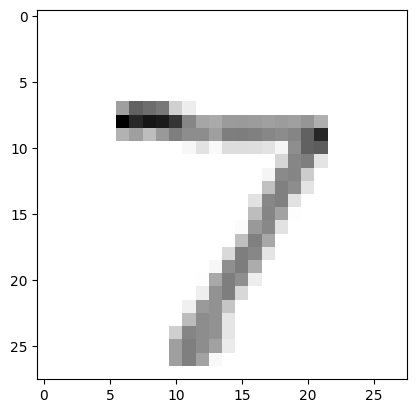

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap=plt.cm.binary)
print(x_test[0])
plt.show()

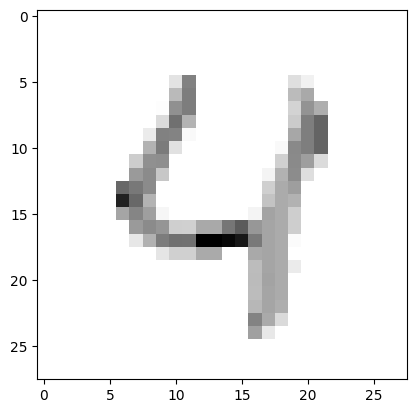

In [15]:
plt.imshow(x_test[4],cmap=plt.cm.binary)
plt.show()